In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from contrastive_hebbian_net import ContrastiveNet
from semantic_task import SemanticTask

In [2]:
np.random.seed(0)

# Testing all regimes for $\gamma$ and $\eta$

In [3]:
hidden_dim = 32
hierarchy_depth = 4
learning_rate = 0.01
weight_scale = 1e-10
batch_size = 2048
test_epochs = 10
epochs = 10000
run_test = False

all_regimes = {"contrastive_hebb": {"gamma": 1.0, "eta": 0.0},
               "gradient_descent": {"gamma": 0.0, "eta": 0.0},
               "quasi_predictive": {"gamma": -1.0, "eta": 0.0},
               "hebbian": {"gamma": 0, "eta": 1.0},
               "anti_hebbian": {"gamma": 0, "eta": -1.0},}

In [4]:
data = SemanticTask(batch_size=batch_size, h_levels=hierarchy_depth)

W1_0 = np.random.normal(scale = weight_scale, size=(hidden_dim, data.input_dim))
W2_0 = np.random.normal(scale = weight_scale, size=(data.output_dim, hidden_dim))

## Testing code

In [5]:
if run_test:
    for key, values in all_regimes.items():
        net = ContrastiveNet(W1_0=W1_0, W2_0=W2_0, gamma=values["gamma"], eta=values["eta"], learning_rate=learning_rate)
        for i in range(test_epochs):
            x, y = data.full_batch()
            h_ff, y_hat = net.forward(x)
            # print(h_ff.shape, y_hat.shape)
            net.update(x, y, y_hat, h_ff)
            net.loss(y_hat, y)
        print(key, "works fine :)")

# Reproducing fig 3 and 4

In [6]:
test_gammas = [-1.0, -0.5, -0.1, 0, 0.1, 0.5, 1.0]
test_etas = [-0.1, -0.05, -0.01, 0, 0.01, 0.05, 0.1]

In [7]:
gamma_results = []

for j, gamma in enumerate(test_gammas):
    net = ContrastiveNet(W1_0=W1_0, W2_0=W2_0, gamma=gamma, eta=0.0, learning_rate=learning_rate)
    training_loss = []
    for i in tqdm(range(epochs)):
        x, y = data.full_batch()
        h_ff, y_hat = net.forward(x)
        net.update(x, y, y_hat, h_ff)
        training_loss.append(net.loss(y_hat, y))
    MDS = h_ff[:, :, 0] @ h_ff[:, :, 0].T
    gamma_results.append({"MDS": MDS, "loss": training_loss})

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:07<00:00, 147.44it/s]


In [8]:
eta_results = []

for j, eta in enumerate(test_etas):
    net = ContrastiveNet(W1_0=W1_0, W2_0=W2_0, gamma=0.0, eta=eta, learning_rate=learning_rate)
    training_loss = []
    for i in tqdm(range(epochs)):
        x, y = data.full_batch()
        h_ff, y_hat = net.forward(x)
        net.update(x, y, y_hat, h_ff)
        training_loss.append(net.loss(y_hat, y))
    MDS = h_ff[:, :, 0] @ h_ff[:, :, 0].T
    eta_results.append({"MDS": MDS, "loss": training_loss})

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:13<00:00, 136.89it/s]


In [12]:
def training_panel(results, key):
    f, ax = plt.subplots(2, len(results), figsize=(3*len(results), 5))
    for i, r in enumerate(results):
        ax[0, i].plot(r["loss"])
        ax[1, i].imshow(r["MDS"])#, vmin=-1, vmax=1)
    plt.show()

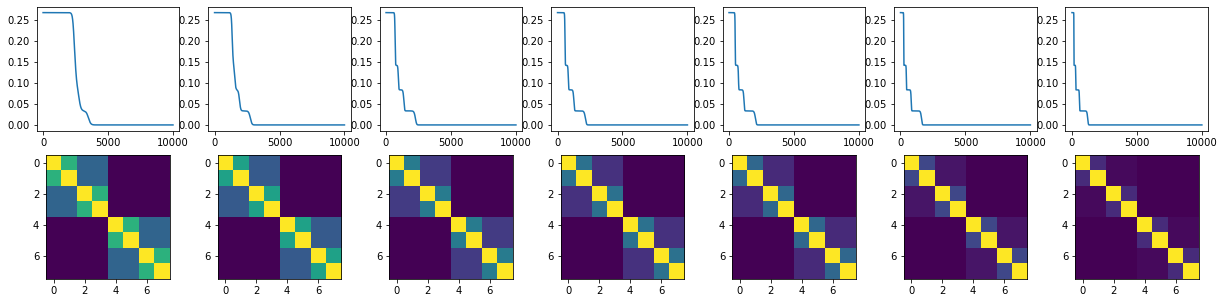

In [13]:
training_panel(results=gamma_results, key="gamma")

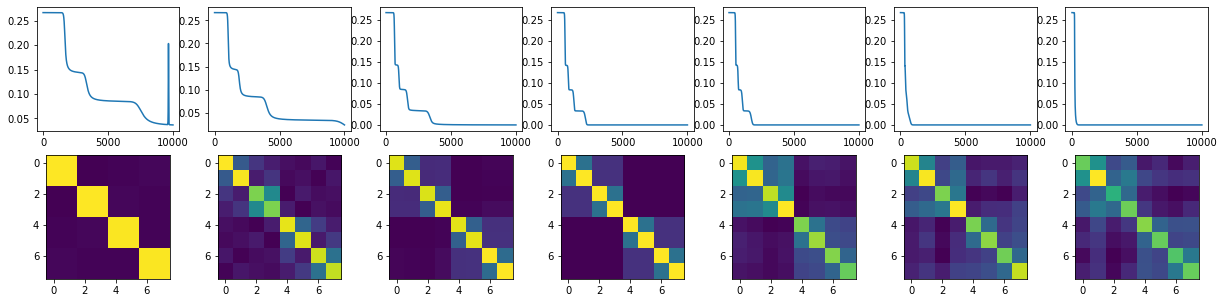

In [14]:
training_panel(results=eta_results, key="eta")